# Tools and Methods of Data Analysis
## Session 6 - Part 2

Niels Hoppe <<niels.hoppe.extern@srh.de>>

## Imports and Utility Function

In [1]:
import math
import numpy as np
import pandas as pd
from pyreadr import read_r
from scipy import stats
from statsmodels.stats.proportion import proportion_confint

def t_confint(series: pd.Series, alpha: float = 0.05):
    n = series.size
    return stats.t.interval(1 - alpha, # confidence
                            # degrees of freedom = sample size minus One
                            df = n - 1,
                            loc = series.mean(),
                            # std. deviation by square root of sample size
                            scale = series.std() / math.sqrt(n)
                            )

## 1) Lifetime of Heat Pumps

A random sample of $n = 20$ heat pumps of a certain type yielded the following observations on lifetime in years: 

Generate sample data by

In [24]:
lifetime = stats.norm.rvs(loc=4, scale=2, size=20, random_state=42)

array([4.99342831, 3.7234714 , 5.29537708, 7.04605971, 3.53169325,
       3.53172609, 7.15842563, 5.53486946, 3.06105123, 5.08512009,
       3.07316461, 3.06854049, 4.48392454, 0.17343951, 0.55016433,
       2.87542494, 1.97433776, 4.62849467, 2.18395185, 1.1753926 ])


1. Assume that the lifetime distribution is normal and calculate a 95% CI for expected (true average) lifetime of all heat pumps of that type. 
2. How should the interval of part (a) be altered to achieve a confidence level of 99%?

In [26]:
stats.t.interval(
    confidence=0.95,
    loc=np.mean(lifetime), # lifetime.mean()
    scale=lifetime.std() / math.sqrt(lifetime.size),
    df=lifetime.size - 1
)

(2.7815420348424746, 4.5332637193902094)

In [3]:
t_confint(lifetime, alpha=1-.95)

(2.7815420348424746, 4.5332637193902094)

In [4]:
t_confint(lifetime, alpha=1-.99)

(2.460197050065249, 4.854608704167435)

## 2) Insulation Liquids

The alternating current (AC) breakdown voltage of an insulating liquid indicates its dielectric strength. The article “Testing Practices for the AC Breakdown Voltage Testing of Insulation Liquids” (IEEE Electrical Insulation Magazine, 1995: 21–26) gave a sample of observations on breakdown voltage (kV) of a particular circuit under certain conditions. 

Generate similar data by

In [5]:
n, mean, std = 3*16, 54.70833, 5.230672
voltage = stats.norm.rvs(loc=mean, scale=std, size=n,
                        random_state=42).round()
voltage

array([57., 54., 58., 63., 53., 53., 63., 59., 52., 58., 52., 52., 56.,
       45., 46., 52., 49., 56., 50., 47., 62., 54., 55., 47., 52., 55.,
       49., 57., 52., 53., 52., 64., 55., 49., 59., 48., 56., 44., 48.,
       56., 59., 56., 54., 53., 47., 51., 52., 60.])

## 2) Insulation Liquids (cont.)

1. Calculate and interpret a 95% CI for true average breakdown voltage $\mu$.
2. What sample size would be appropriate for the 95% CI to have a width of 2 kV (so that $\mu$ is estimated to within 1 kV with 95% confidence)? Use the standard deviation s of the dataset "voltage" and $t_{0.975} ≈ 2$ as estimates.

In [6]:
t_confint(voltage, alpha=1-.95)

(52.23290878727209, 55.01709121272791)

In [7]:
math.ceil((voltage.std() * 2) ** 2)

def critical_value_norm(alpha):
    return stats.norm.ppf(1 - (alpha) / 2)

def samplesize_confint_norm(std, half_length, alpha):
    z = critical_value_norm(alpha)
    return (z**2 * std**2) / half_length**2

samplesize_confint_norm(voltage.std(), 1, 1 - 0.95)

88.29353008189153

## 3) Wafer

The article “Limited Yield Estimation for Visual Defect Sources” (IEEE Trans. on Semiconductor Manuf., 1997: 17–23) reported that, in a study of a particular wafer inspection process, 356 dies were examined by an inspection probe and 201 of these passed the probe. Assuming a stable process, calculate a 95% (two-sided) confidence interval for the proportion of all dies that pass the probe.

In [8]:
proportion_confint(201, 356, alpha=1-.95)

(0.5131032144560886, 0.6161102686899788)

## 4) Paper as Insulator

The article “Measuring and Understanding the Aging of Kraft Insulating Paper in Power Transformers” (IEEE Electrical Insul. Mag., 1996: 28–34) contained the following observations on degree of polymerization for paper specimens for which viscosity times concentration fell in a certain middle range. (Data: ex07.33)

1. Construct a boxplot and a normal qq-plot of the data and comment on any interesting features. 
2. Is it plausible that the given sample observations were selected from a normal distribution?
3. Calculate a two-sided 95% confidence interval for true average degree of polymerization (as did the authors of the article). Does the interval suggest that 440 is a plausible value for true average degree of polymerization? What about 450?

In [9]:
data = read_r('../data/devore7/ex07.33.rda')
df = data['ex07.33']

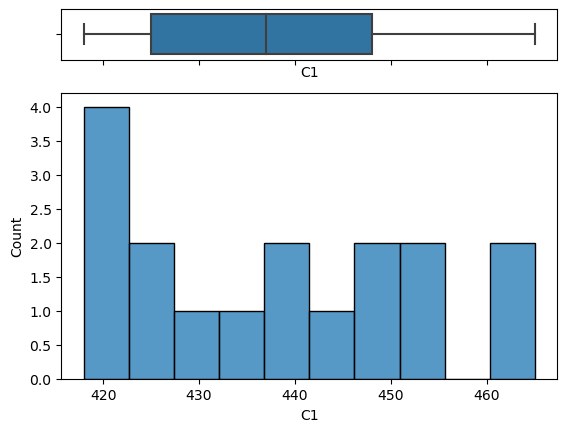

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
sns.boxplot(x=df['C1'], ax=ax_box)
sns.histplot(x=df['C1'], bins=10, ax=ax_hist)
None # <-- suppress output in Jupyter notebook

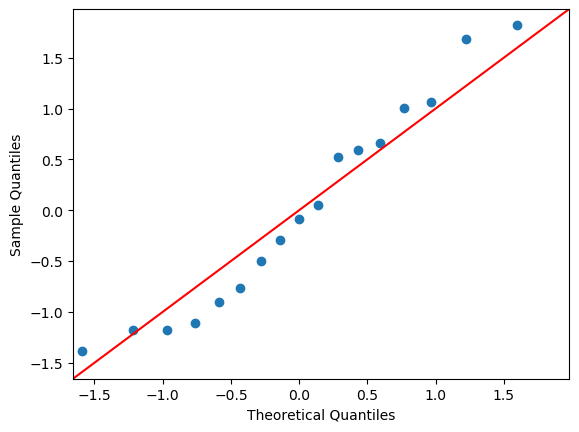

In [11]:
sm.qqplot(df['C1'], line='45', fit=True)
plt.show()

In [12]:
t_confint(df['C1'], alpha=1-.95)

(430.5077089589564, 446.08052633516127)

## 5) Arsenic in Groundwater

High concentration of the toxic element arsenic is all too common in groundwater. The article “Evaluation of Treatment Systems for the Removal of Arsenic from Groundwater” (Practice Periodical of Hazardous, Toxic, and Radioactive Waste Mgmt., 2005: 152–157) reported that for a sample of water specimens selected for treatment by coagulation, the sample mean arsenic concentration was 24.3 μg/L, and the sample standard deviation was 4.1 μg/L. 

Generate a similar dataset by

In [13]:
mean, std = 24.3, 4.1
x = pd.Series(stats.norm.rvs(loc=mean, scale=std, size=20, random_state=42)).round(1)
concentration = ((mean + std * x - x.mean()) / x.std()).round(1)


1. Calculate and interpret a 95% CI for true average arsenic concentration in all such water specimens. 
2. Calculate a 90% upper confidence bound for true average arsenic concentration in all such water specimens. 

## 5) Arsenic in Groundwater (cont.)

In [14]:
t_confint(concentration, alpha=1-.95)

(22.859273389585667, 26.700726610414335)

In [15]:
ci = t_confint(concentration, alpha=1-.8)
ci = (-math.inf, ci[1])
ci

(-inf, 25.99842981073456)

## 6) Wireless Means for Online Access

An April 2009 survey of 2253 American adults conducted by the Pew Research Center’s Internet & American Life Project revealed that 1262 of the respondents had at some point used wireless means for online access.

1. Calculate and interpret a 95% CI for the proportion of all American adults who at the time of the survey had used wireless means for online access. 
2. Does the upper limit of the interval in (a) specify a 95% upper confidence bound for the proportion being estimated? Explain.
3. What sample size is required if the desired width of the 95% CI is to be at most .04, using the sample results? 

## 6) Wireless Means for Online Access (cont.)

In [16]:
proportion_confint(1262, 2253, alpha=1-.95)

(0.5396458584288474, 0.5806382072613435)

In [17]:
proportion_confint(1262, 2253, alpha=1-.9)

(0.5429411010457761, 0.5773429646444148)

In [18]:
p = 1262/2253
n = 1.96**2 * p * (1 - p) / .02**2
n

2366.2617162420315

In [19]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n = samplesize_confint_proportion(proportion=p, half_length=.02, alpha=0.05)
n

2366.174755812364

## 7) Asbestos

Chronic exposure to asbestos fiber is a well-known health hazard.
The article “The Acute Effects of Chrysotile Asbestos Exposure on Lung Function” (Environ. Research, 1978: 360–372) reports results of a study based on a sample of construction workers who had been exposed to asbestos over a prolonged period.
Among the data given in the article were the following (ordered) values of pulmonary compliance (cm³/cm H2O) for each of 16 subjects 8 months after the exposure period (pulmonary compliance is a measure of lung elasticity,
or how effectively the lungs are able to inhale and exhale). (Data: ex07.56)
    
1. Is it plausible that the population distribution is normal?
2. Compute a 95% CI for the true average pulmonary compliance after such exposure.
3. Using the sample point estimates for mean and standard deviation, calculate an interval that includes 95% of the pulmonary compliance values in the population distribution. 

In [20]:
data = read_r('../data/devore7/ex07.56.rda')
df = data['ex07.56']

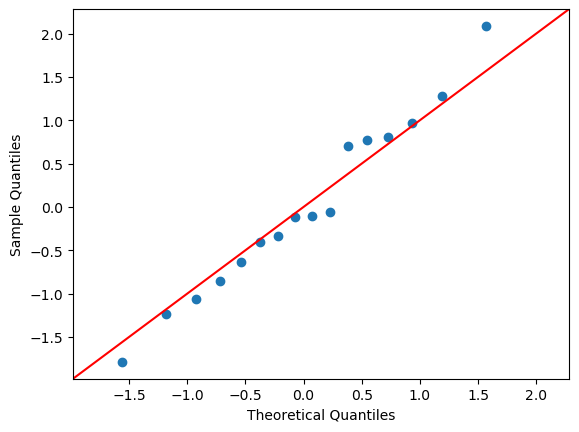

In [21]:
sm.qqplot(df['C1'], line='45', fit=True)
plt.show()

In [22]:
t_confint(df['C1'], alpha=1-.95)

(196.87807695769663, 222.62192304230337)

In [23]:
mean, std = df['C1'].mean(), df['C1'].std()
(   stats.norm.ppf(0.025, loc=mean, scale=std),
    stats.norm.ppf(0.975, loc=mean, scale=std)   )

(162.40474497907388, 257.0952550209261)